In [163]:
#Import libraries for DB analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
#first 20 rows
df.head(20)

#check types of data
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')
Index(['Fuel_Type'], dtype='object')


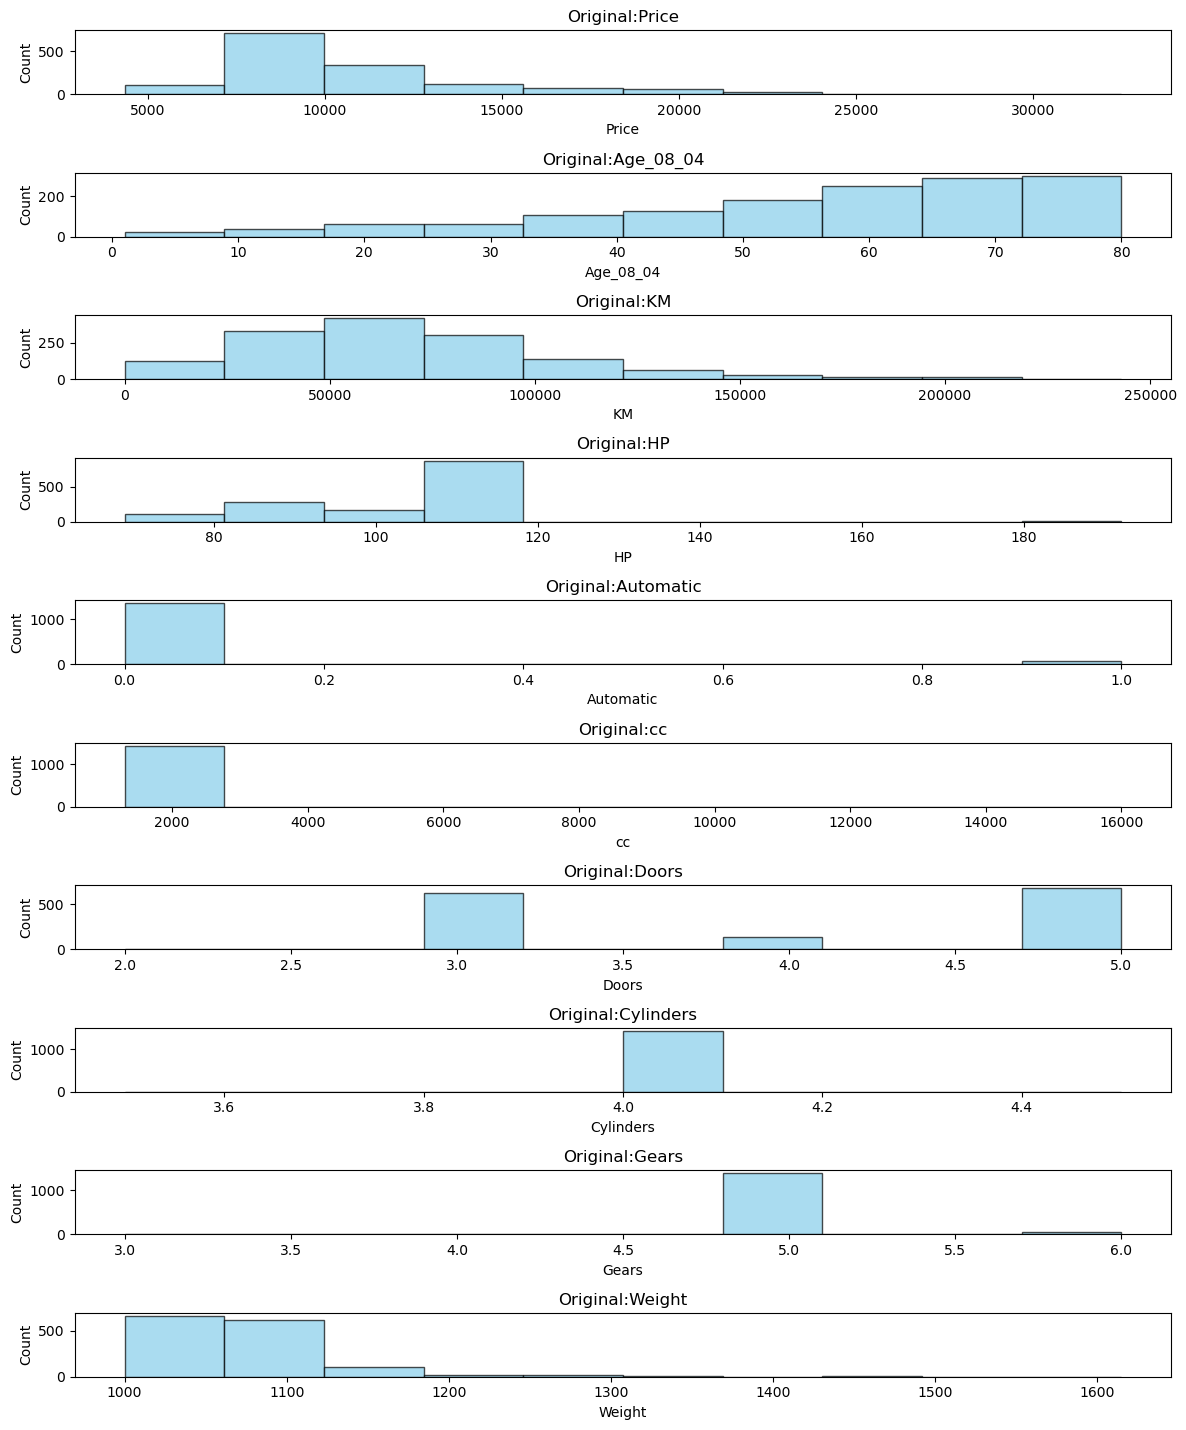

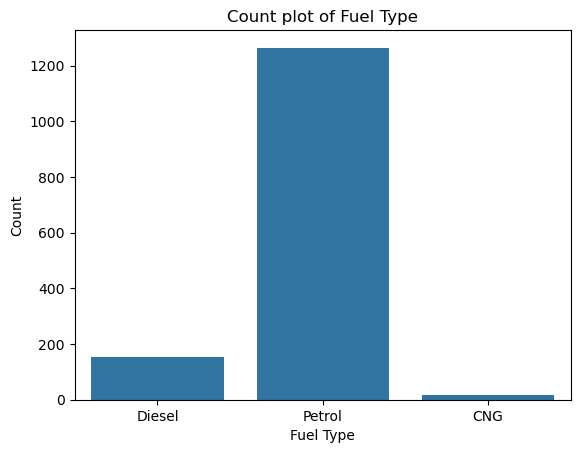

In [165]:
#Identify numerical columns in the dataset
numeric_col = df.select_dtypes(include=['int64','float64']).columns
categ_col = df.select_dtypes(include=['object','category']).columns
numeric_col_str = str(numeric_col)
categ_col_str = str(categ_col)
print(numeric_col_str)
print(categ_col_str)

#Plot the histogram for numerical column to understand the Data
fig,axes = plt.subplots(len(numeric_col),1,figsize=(12,15))

for i,col in enumerate(numeric_col):
    axes[i].hist(df[col],bins=10,color='skyblue',edgecolor='black',alpha=0.7)
    axes[i].set_title(f"Original:{col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#Plot the count plot for Categorical column to understand the Data
sns.countplot(x='Fuel_Type',data=df)
plt.title('Count plot of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [166]:
#select column that have object data types
colname = []
for x in df.columns:
    if df[x].dtypes==object:
        colname.append(x)


#convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in colname:
    df[x] = le.fit_transform(df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("feature:", x)
    print("mapping:", le_name_mapping)

feature: Fuel_Type
mapping: {'CNG': 0, 'Diesel': 1, 'Petrol': 2}


In [167]:
df.dtypes

Price        int64
Age_08_04    int64
KM           int64
Fuel_Type    int32
HP           int64
Automatic    int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [168]:
#check null values
df.isnull().sum()

#Treat duplicate values
df_Toyota_cleaned = df.drop_duplicates()


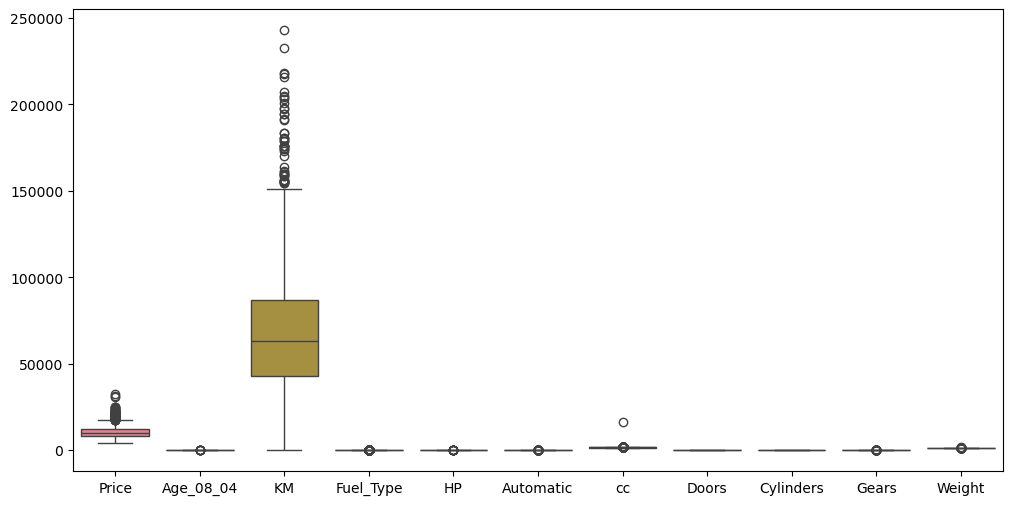

In [169]:
#check outliers
numeric_col = df.select_dtypes(include='int')
plt.figure(figsize=(12, 6))
sns.boxplot(data = numeric_col)
plt.show()

In [170]:
#remove outliers
mask = pd.Series(True, index=df.index)

for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    LQR = Q3-Q1
    lower = Q1 - 1.5 * LQR
    upper = Q3 + 1.5 * LQR
    mask &= df[col].between(lower, upper)
df_clean = df[mask]

In [171]:
df_clean.shape

(1059, 11)

<Axes: >

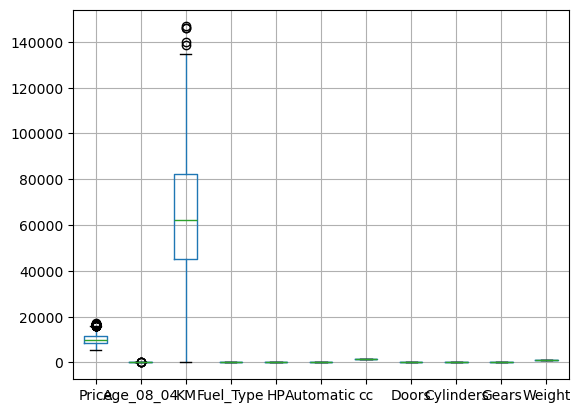

In [172]:
df_clean.boxplot()

In [173]:
df_clean.shape

(1059, 11)

In [174]:
df_clean.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
23,16950,28,32220,2,110,0,1600,3,4,5,1120


In [175]:
x = df_clean[['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']]
y = df_clean[['Price']]

In [176]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [177]:

# 3. Building and interpreting multiple linear regression models

# Model 1: Simple Linear regression model
print("Model 1")
model1 = LinearRegression()
model1.fit(x_train,y_train)

#Coefficients and intercept
print("Coefficiants:",model1.coef_)
print("Intercept:",model1.intercept_)

# 4. Model Evaluation
predictions = model1.predict(x_test)
print("Mean Squared error:", mean_squared_error(y_test,predictions))
print("R-squared:",r2_score(y_test,predictions))


Model 1
Coefficiants: [[-1.10757314e+02 -1.24900735e-02  1.19015908e-13 -9.63259903e+01
   1.42108547e-14  6.71139119e+00 -4.05890965e+01  0.00000000e+00
   0.00000000e+00  2.34828522e+01]]
Intercept: [-7411.07013303]
Mean Squared error: 892320.4234534102
R-squared: 0.8009332227746522


In [178]:
# Model 2:  Linear Regression with selected features (Age, KM,HP,Weight)
print("Model 2")
X_selected = x_train[['Age_08_04','KM','HP','Weight']]
X_test_selected = x_test[['Age_08_04', 'KM', 'HP', 'Weight']]
model2 = LinearRegression()
model2.fit(X_selected,y_train)

# 4. Model evaluation
predictions = model2.predict(X_test_selected)
print("Mean Squared Error:",mean_squared_error(y_test,predictions))
print("R-squared:",r2_score(y_test,predictions))

#Coefficients and intercept
print("Model 2 Coefficiants:",model2.coef_)
print("Model 2 Intercept:",model2.intercept_)

Model 2
Mean Squared Error: 904367.2682359604
R-squared: 0.7982457054842653
Model 2 Coefficiants: [[-1.08355006e+02 -1.23801147e-02 -8.80886821e+00  2.22145130e+01]]
Model 2 Intercept: [-5286.91763673]


In [179]:

#Model 3: Linear Regression without 'Doors' and 'Automatic'
print("Model 3")
X_train_mod = x_train.drop(['Doors','Automatic'],axis=1)
X_test_mod = x_test.drop(['Doors','Automatic'],axis=1)
model3 = LinearRegression()
model3.fit(X_train_mod,y_train)

# 4. Model evaluation
predictions = model3.predict(X_test_mod)
print("Mean Squared Error:", mean_squared_error(y_test,predictions))
print("R-squared:",r2_score(y_test,predictions))

#Coefficients and intercept
print("Model 3 Coefficiants:",model3.coef_)
print("Model 3 Intercept:",model3.intercept_)

Model 3
Mean Squared Error: 898235.9527731923
R-squared: 0.7996135338755528
Model 3 Coefficiants: [[-1.10987123e+02 -1.25077124e-02 -6.00408612e-13 -9.17850890e+01
   6.41094577e+00  0.00000000e+00  0.00000000e+00  2.24366740e+01]]
Model 3 Intercept: [-6471.76660646]


In [180]:
# 5. Applying Lasso and ridge regression
print("Lasso & Ridge Regression")
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
lasso_prediction = lasso.predict(x_test)
print("Lasso Mean squared error:",mean_squared_error(y_test,lasso_prediction))
print("Lasso R-squared:",r2_score(y_test,lasso_prediction))

ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
ridge_predictions = ridge.predict(x_test)
print("Ridge Mean squared error:",mean_squared_error(y_test,ridge_predictions))
print("Ridge R_Squared:",r2_score(y_test,ridge_predictions))

Lasso & Ridge Regression
Lasso Mean squared error: 892342.7415668863
Lasso R-squared: 0.800928243851379
Ridge Mean squared error: 892321.5432305592
Ridge R_Squared: 0.8009329729648054


c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.332e+08, tolerance: 4.846e+05
  model = cd_fast.enet_coordinate_descent(
